In [27]:
! pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as y
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:


def downlaod_stocks_data(ticker, start, end):
    df = y.download(ticker, start=start, end = end)

    
    
    return df


df = downlaod_stocks_data('AAPL', '2000-01-01', '2025-12-31')


[*********************100%***********************]  1 of 1 completed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6538 entries, 2000-01-03 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6538 non-null   float64
 1   (High, AAPL)    6538 non-null   float64
 2   (Low, AAPL)     6538 non-null   float64
 3   (Open, AAPL)    6538 non-null   float64
 4   (Volume, AAPL)  6538 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 306.5 KB


In [4]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.839280,0.843498,0.762428,0.786328,535796800
2000-01-04,0.768521,0.829440,0.758680,0.811633,512377600
2000-01-05,0.779767,0.828971,0.772269,0.777892,778321600
2000-01-06,0.712287,0.802260,0.712287,0.795700,767972800
2000-01-07,0.746027,0.757274,0.716037,0.723534,460734400


In [6]:
def validate_data(data):
    validation_report={
        'total_rows': len(data),
        'total_cols': len(data.columns),
        'missing_values': data.isnull().sum().to_dict()
    }
    return validation_report

report = validate_data(df)
print(f'Data Validation report \n {report}')

Data Validation report 
 {'total_rows': 6538, 'total_cols': 5, 'missing_values': {('Close', 'AAPL'): 0, ('High', 'AAPL'): 0, ('Low', 'AAPL'): 0, ('Open', 'AAPL'): 0, ('Volume', 'AAPL'): 0}}


In [7]:
train = df[(df.index.year < 2024) & (df.index.year >= 2000)]
test = df[df.index.year >= 2024]

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2000-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6037 non-null   float64
 1   (High, AAPL)    6037 non-null   float64
 2   (Low, AAPL)     6037 non-null   float64
 3   (Open, AAPL)    6037 non-null   float64
 4   (Volume, AAPL)  6037 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 283.0 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2024-01-02 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   501 non-null    float64
 1   (High, AAPL)    501 non-null    float64
 2   (Low, AAPL)     501 non-null    float64
 3   (Open, AAPL)    501 non-null    float64
 4   (Volume, AAPL)  501 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB


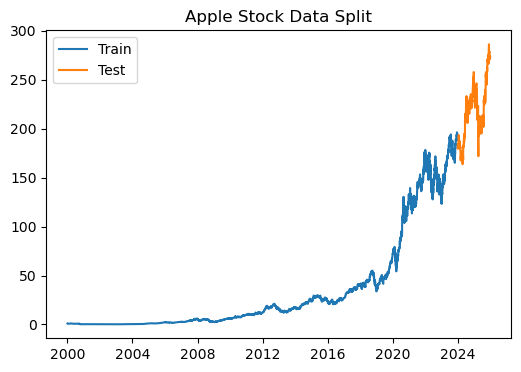

In [10]:
plt.figure(figsize=(6,4))
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label = 'Test')
plt.legend()
plt.title('Apple Stock Data Split')
plt.show()

In [11]:
# feature scaling:
# feature scaling:


scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(train['Close'].values.reshape(-1, 1))
training_set_scaled

array([[0.00327726],
       [0.00291635],
       [0.00297371],
       ...,
       [0.97493824],
       [0.97711086],
       [0.97180538]])

In [12]:
X_train = []
y_train = []

for i in range(80, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-80: i, 0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(5957, 80)
(5957,)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

(5957, 80, 1)


In [15]:
import tensorflow as tf


model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units= 128, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=32, ))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

model.summary()


c:\Users\thedo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 80, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 80, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss=['mse'], metrics=['mae', 'mse', 'mape'])

In [17]:

early_stopping=tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience= 5,
        restore_best_weights=True
    )
lr_reduce= tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr = 1e-7
    )

In [18]:
model.fit(X_train, y_train, epochs=100, batch_size=24, callbacks=[early_stopping, lr_reduce], validation_split=0.1)

Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 28s 104ms/step - loss: 0.0011 - mae: 0.0178 - mape: 2075.8032 - mse: 0.0011 - val_loss: 0.0017 - val_mae: 0.0330 - val_mape: 4.2311 - val_mse: 0.0017 - learning_rate: 0.0010
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 23s 102ms/step - loss: 6.6832e-04 - mae: 0.0152 - mape: 2254.4014 - mse: 6.6832e-04 - val_loss: 0.0022 - val_mae: 0.0366 - val_mape: 4.7217 - val_mse: 0.0022 - learning_rate: 0.0010
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 26s 115ms/step - loss: 6.7797e-04 - mae: 0.0152 - mape: 2138.8176 - mse: 6.7797e-04 - val_loss: 0.0049 - val_mae: 0.0608 - val_mape: 7.2260 - val_mse: 0.0049 - learning_rate: 0.0010
Epoch 4/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 28s 125ms/step - loss: 4.4603e-04 - mae: 0.0112 - mape: 855.8015 - mse: 4.4603e-04 - val_loss: 0.0119 - val_mae: 0.1027 - val_mape: 12.3557 - val_mse: 0.0119 - learning_rate: 0.0010
Epoch 5/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - loss: 4.4966e-04 - mae: 0.0118 - mape: 2988.1438 - mse: 4.

In [19]:
# testing the model on un-seen data.

dataset_test = test['Close'].values.reshape(-1,1)
scaled_dataset_test = scaler.transform(dataset_test)

# create X_test
window_size = 80 # same as the size of training

X_test = []

inputs = df['Close'][len(df) - len(test)  - window_size:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size: i, 0])

X_test  = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f'Shape of X_test: {X_test.shape}')



Shape of X_test: (501, 80, 1)


In [20]:
# Prediction:
predicted_stocks_values_scaled = model.predict(X_test)

predicted_stocks_values = scaler.inverse_transform(predicted_stocks_values_scaled)

actual_values = test['Close'].values
print(predicted_stocks_values)
print(actual_values)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
[[185.33554]
 [184.84456]
 [184.09418]
 [183.10689]
 [181.98843]
 [181.0404 ]
 [180.33171]
 [179.89633]
 [179.66168]
 [179.57219]
 [179.47983]
 [179.31104]
 [179.30707]
 [179.59215]
 [180.18854]
 [181.02173]
 [181.92093]
 [182.75151]
 [183.37796]
 [183.76195]
 [183.80165]
 [183.43555]
 [182.88745]
 [182.26462]
 [181.73251]
 [181.40504]
 [181.27759]
 [181.25528]
 [181.31154]
 [181.34232]
 [181.24292]
 [180.99402]
 [180.63647]
 [180.17375]
 [179.63727]
 [179.11842]
 [178.74686]
 [178.46242]
 [178.18803]
 [177.97154]
 [177.76945]
 [177.55116]
 [177.281  ]
 [176.79909]
 [175.95636]
 [174.82475]
 [173.56363]
 [172.39493]
 [171.50082]
 [170.92227]
 [170.52563]
 [170.31635]
 [170.22942]
 [170.25708]
 [170.4526 ]
 [170.87071]
 [171.13799]
 [171.22247]
 [171.09854]
 [170.78181]
 [170.49747]
 [170.23892]
 [169.95834]
 [169.6169 ]
 [169.273  ]
 [168.92732]
 [168.63185]
 [168.3556 ]
 [168.15025]
 [167.94133]
 [168.01854]
 [168.42867]
 [168.9078 ]
 [169.20244

In [21]:
print(actual_values)

[[183.90319824]
 [182.52622986]
 [180.20811462]
 [179.48492432]
 [183.82395935]
 [183.40791321]
 [184.44810486]
 [183.85369873]
 [184.18060303]
 [181.91204834]
 [180.97091675]
 [186.86526489]
 [189.76783752]
 [192.07603455]
 [193.35397339]
 [192.68035889]
 [192.35342407]
 [190.61981201]
 [189.93626404]
 [186.28079224]
 [182.67483521]
 [185.11180115]
 [184.11125183]
 [185.9241333 ]
 [187.52900696]
 [187.63796997]
 [186.55815125]
 [187.32191467]
 [185.63568115]
 [183.54273987]
 [182.65995789]
 [182.37229919]
 [180.83486938]
 [180.09089661]
 [180.84477234]
 [182.87817383]
 [181.04316711]
 [179.69415283]
 [181.15226746]
 [179.95204163]
 [179.28744507]
 [178.20629883]
 [173.68318176]
 [168.74345398]
 [167.7515564 ]
 [167.63253784]
 [169.348526  ]
 [171.35220337]
 [171.82830811]
 [169.74530029]
 [171.60015869]
 [171.22325134]
 [172.31434631]
 [174.65525818]
 [177.22428894]
 [169.9833374 ]
 [170.88600159]
 [169.46757507]
 [168.33682251]
 [171.90765381]
 [170.092453  ]
 [168.65420532]
 [167.47

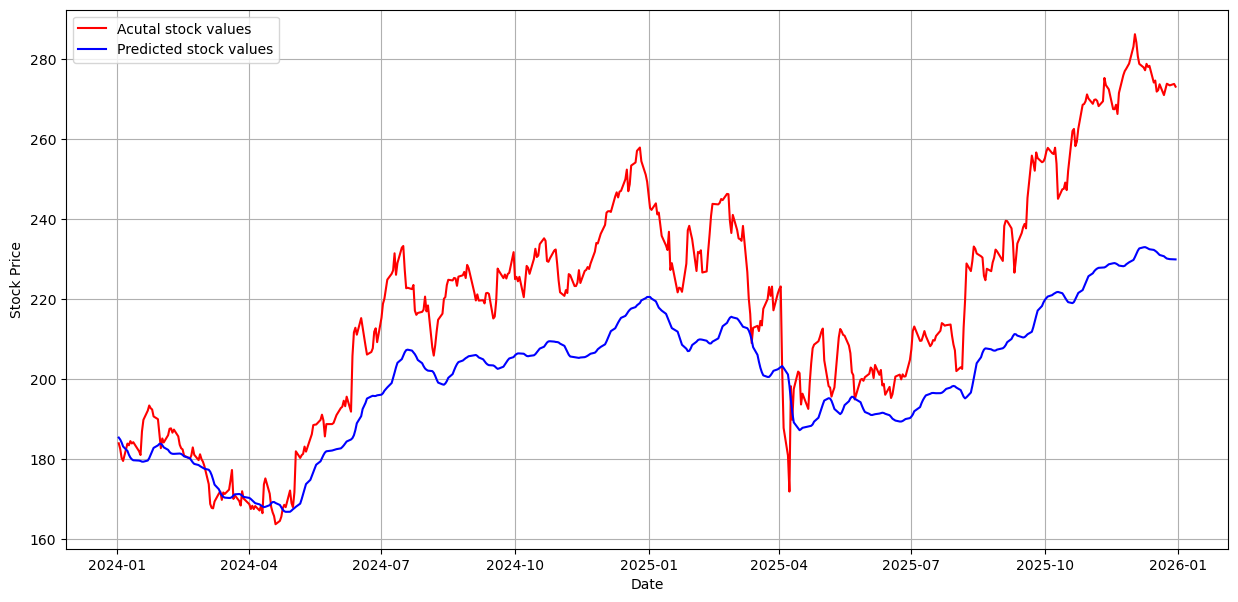

In [22]:
# Graphical representation of actual and predicted values


plt.figure(figsize=(15,7))
plt.plot(test.index, actual_values, color='Red', label='Acutal stock values')
plt.plot(test.index, predicted_stocks_values, color='blue', label='Predicted stock values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print(f'Mean squared error: {mean_squared_error(actual_values, predicted_stocks_values):.4f}')
print(f'Mean absolute error: {mean_absolute_error(actual_values, predicted_stocks_values):.4f}')
print(f'Root mean squared error: {math.sqrt(mean_absolute_error(actual_values, predicted_stocks_values)):.4f}')

Mean squared error: 205.4382
Mean absolute error: 11.4755
Root mean squared error: 3.3875
